## 🗃️ **Import necessary libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dataf= pd.read_csv('DailyAlgiersClimate.csv')

In [13]:
print(dataf.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02        NaN        NaN    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04        NaN  71.333333    1.233333   1017.166667
4  2013-01-05        NaN  86.833333    3.700000   1016.500000


- NaN represent missing values 

In [14]:
# Check for missing values
missing_values = dataf.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 date              0
meantemp        439
humidity        439
wind_speed      439
meanpressure      0
dtype: int64


- This means that only meantemp,humidity and wind_speed has missing values and exactly there is 439 missing values in each column 

- The isnull().sum() function helps us count the number of missing values in each column.

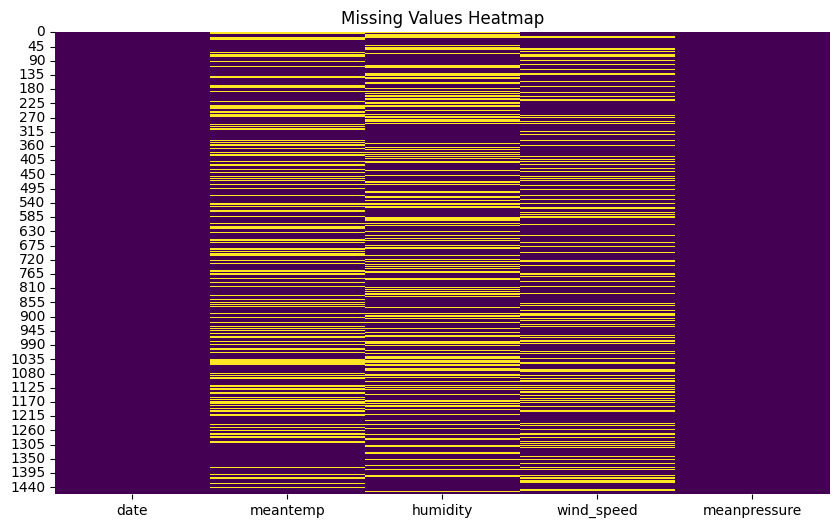

In [15]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataf.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### 🗞️ **Impute Missing Values**

- for Imputation we have : 

**Forward Fill (ffill):** Propagate the last valid observation forward.

**Backward Fill (bfill):** Use the next valid observation to fill the gap.

**Linear Interpolation:** Estimate values based on a linear relationship between existing points.

In [16]:
# Forward fill is useful when the missing values are likely to be similar to the previous values.
# and Linear interpolation is more accurate for time-series data 
# and since the data we're working on is a time-series dataset.so i will use the Linear interpolation imputation 
# Also Linear interpolation often provides smoother results compared to forward fill.

In [17]:
df_interpolated = dataf.interpolate(method='linear')
print("Original Data:\n", dataf.head(10))
print("\nLinear Interpolation:\n", df_interpolated.head(10))

Original Data:
          date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02        NaN        NaN    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04        NaN  71.333333    1.233333   1017.166667
4  2013-01-05        NaN  86.833333    3.700000   1016.500000
5  2013-01-06   7.000000  82.800000    1.480000   1018.000000
6  2013-01-07        NaN        NaN    6.300000   1020.000000
7  2013-01-08   8.857143        NaN    7.142857   1018.714286
8  2013-01-09  14.000000  51.250000   12.500000   1017.000000
9  2013-01-10        NaN  62.000000    7.400000   1015.666667

Linear Interpolation:
          date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   8.583333  85.750000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   7.111111  71.3

C:\Users\pc\AppData\Local\Temp\ipykernel_12500\2312332810.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = dataf.interpolate(method='linear')


- so now all the missing values has been filled using Linear interpolation imputation 

### 🤖 **Visualize Data Before and After Imputation**

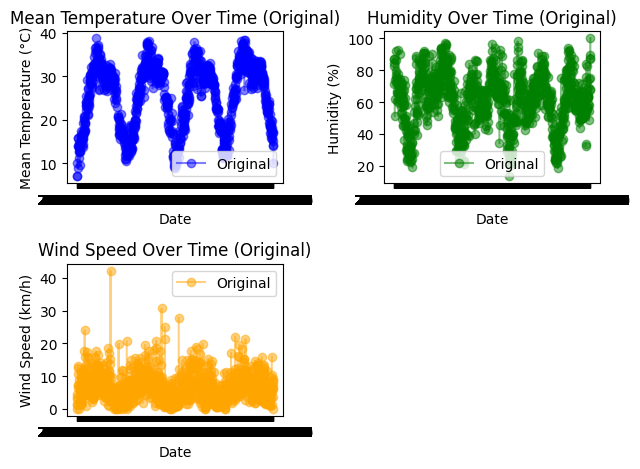

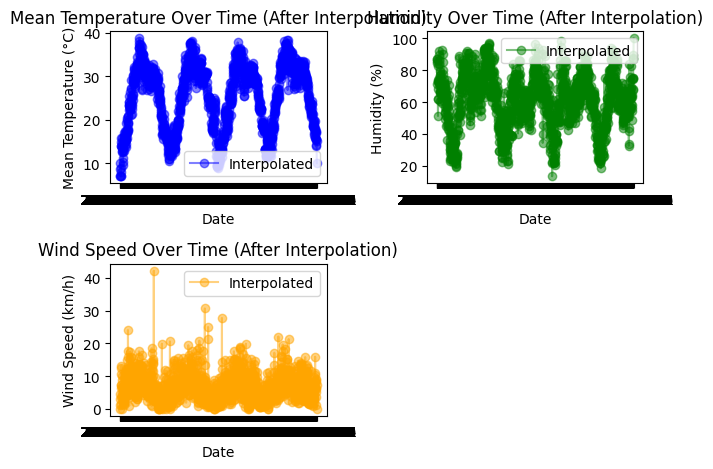

In [18]:

#Plot original data with missing values
#plt.figure(figsize=(14, 8))

# Plot meantemp before interpolation
plt.subplot(2, 2, 1)
plt.plot(dataf['date'], dataf['meantemp'], 'o-', label='Original', alpha=0.5, color='blue')
plt.title("Mean Temperature Over Time (Original)")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend()

# Plot humidity before interpolation
plt.subplot(2, 2, 2)
plt.plot(dataf['date'], dataf['humidity'], 'o-', label='Original', alpha=0.5, color='green')
plt.title("Humidity Over Time (Original)")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.legend()

# Plot wind_speed before interpolation
plt.subplot(2, 2, 3)
plt.plot(dataf['date'], dataf['wind_speed'], 'o-', label='Original', alpha=0.5, color='orange')
plt.title("Wind Speed Over Time (Original)")
plt.xlabel("Date")
plt.ylabel("Wind Speed (km/h)")
plt.legend()

plt.tight_layout()
plt.show()

# Plot data after linear interpolation
#plt.figure(figsize=(14, 8))

# Plot meantemp after interpolation
plt.subplot(2, 2, 1)
plt.plot(df_interpolated['date'], df_interpolated['meantemp'], 'o-', label='Interpolated', alpha=0.5, color='blue')
plt.title("Mean Temperature Over Time (After Interpolation)")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend()

# Plot humidity after interpolation
plt.subplot(2, 2, 2)
plt.plot(df_interpolated['date'], df_interpolated['humidity'], 'o-', label='Interpolated', alpha=0.5, color='green')
plt.title("Humidity Over Time (After Interpolation)")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.legend()

# Plot wind_speed after interpolation
plt.subplot(2, 2, 3)
plt.plot(df_interpolated['date'], df_interpolated['wind_speed'], 'o-', label='Interpolated', alpha=0.5, color='orange')
plt.title("Wind Speed Over Time (After Interpolation)")
plt.xlabel("Date")
plt.ylabel("Wind Speed (km/h)")
plt.legend()

plt.tight_layout()
plt.show()

- **Before Interpolation:**

You will see gaps in the plots where missing values exist in the original dataset.

- **After Interpolation:**

The gaps will be filled with interpolated values, and the plots will show smooth, continuous lines for each column.

### 🤖 **Basic Data Analysis**

Summary Statistics for Interpolated Data:
                       date     meantemp     humidity   wind_speed  \
count                 1462  1462.000000  1462.000000  1462.000000   
mean   2015-01-01 12:00:00    25.533098    60.919173     6.782298   
min    2013-01-01 00:00:00     7.000000    13.428571     0.000000   
25%    2014-01-01 06:00:00    19.000000    51.161706     3.700000   
50%    2015-01-01 12:00:00    27.810714    62.714286     6.271875   
75%    2016-01-01 18:00:00    31.375000    72.285119     9.186905   
max    2017-01-01 00:00:00    38.714286   100.000000    42.220000   
std                    NaN     7.325446    16.560397     4.239242   

       meanpressure        Month  
count   1462.000000  1462.000000  
mean    1011.104548     6.519152  
min       -3.041667     1.000000  
25%     1001.580357     4.000000  
50%     1008.563492     7.000000  
75%     1014.944901    10.000000  
max     7679.333333    12.000000  
std      180.231668     3.451727  


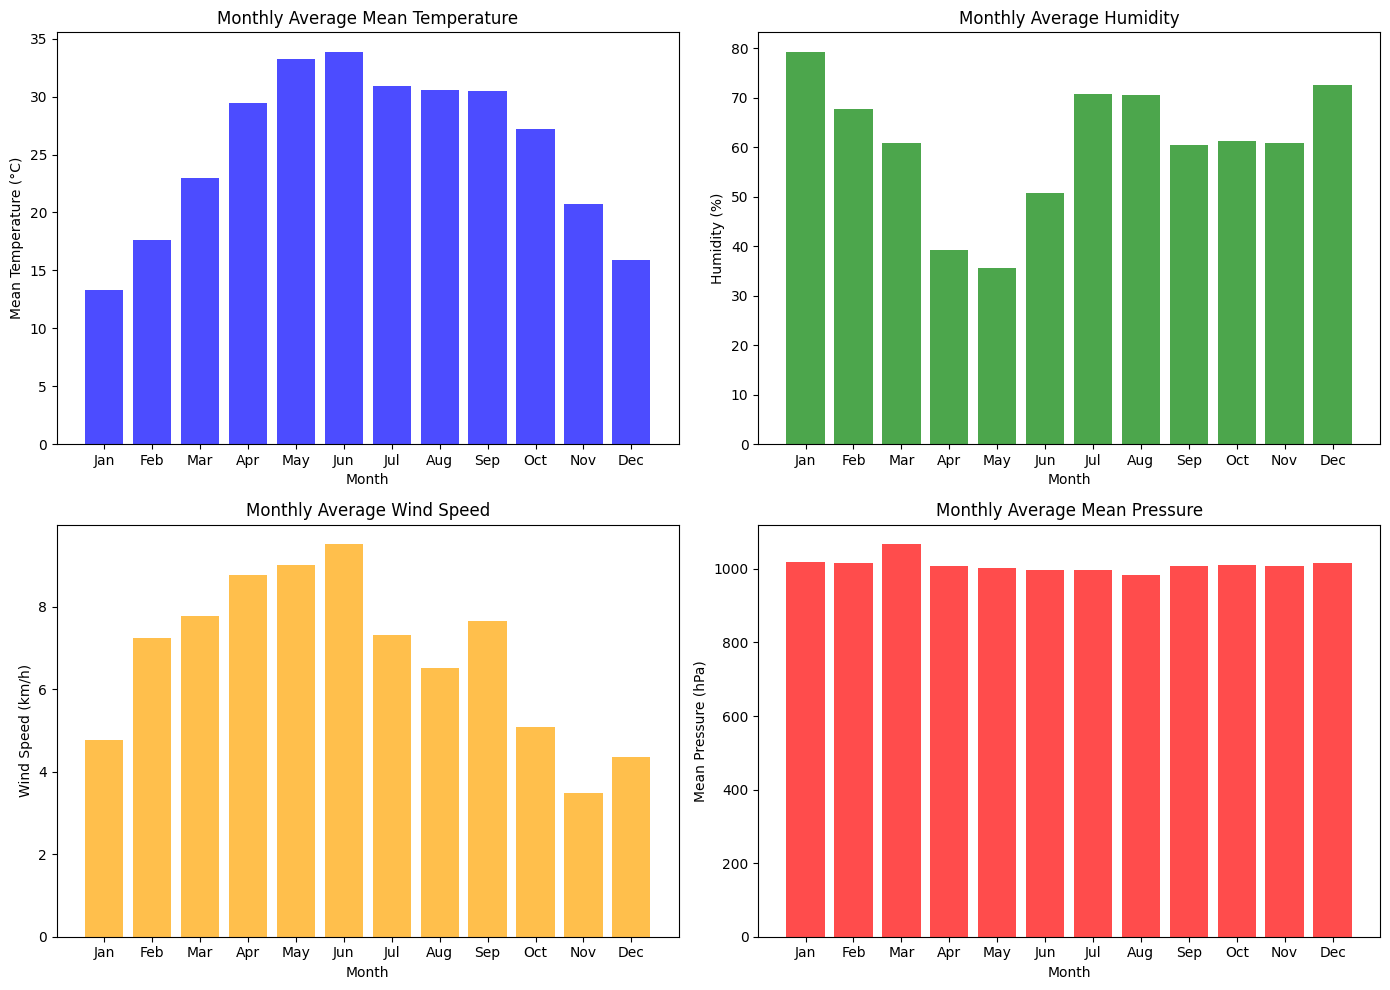

In [19]:
# Convert 'date' column to datetime format (if not already done)
df_interpolated['date'] = pd.to_datetime(df_interpolated['date'])

# Add a 'Month' column for monthly analysis
df_interpolated['Month'] = df_interpolated['date'].dt.month

print("Summary Statistics for Interpolated Data:\n", df_interpolated.describe())

monthly_avg = df_interpolated.groupby('Month').agg({
    'meantemp': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'meanpressure': 'mean'
}).reset_index()

# Plot monthly averages
plt.figure(figsize=(14, 10))

# Plot monthly average temperature
plt.subplot(2, 2, 1)
plt.bar(monthly_avg['Month'], monthly_avg['meantemp'], color='blue', alpha=0.7)
plt.title("Monthly Average Mean Temperature")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot monthly average humidity
plt.subplot(2, 2, 2)
plt.bar(monthly_avg['Month'], monthly_avg['humidity'], color='green', alpha=0.7)
plt.title("Monthly Average Humidity")
plt.xlabel("Month")
plt.ylabel("Humidity (%)")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot monthly average wind speed
plt.subplot(2, 2, 3)
plt.bar(monthly_avg['Month'], monthly_avg['wind_speed'], color='orange', alpha=0.7)
plt.title("Monthly Average Wind Speed")
plt.xlabel("Month")
plt.ylabel("Wind Speed (km/h)")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot monthly average mean pressure
plt.subplot(2, 2, 4)
plt.bar(monthly_avg['Month'], monthly_avg['meanpressure'], color='red', alpha=0.7)
plt.title("Monthly Average Mean Pressure")
plt.xlabel("Month")
plt.ylabel("Mean Pressure (hPa)")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

- date column contains datetime values, which are not numeric; and i'm using summary statistics like mean,and percentiles (25%, 50%, 75%) are only meaningful for numeric data.

Since the date column is not numeric, functions like mean can't be applied to it, resulting in NaN (missing values ) so the NaN in the date column **is expected**

- **The describe() function** provides key statistics (mean, standard deviation, min, max, etc.) for each column in the interpolated dataset.